<center> <h1> <b> OdinSchool - Capstone Project </b> </h1> 
<h2> By Anjali Pal </h2> </center>

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aim

Identify how salary is varying with respect to considerable factors.

# Why is it necessary?

If a company doesn't compensate its employees appropriately, employees will leave the company and join other firms that are paying better. This would a loss for the company as they won't be benefitted by the skills acquired by an employee from their resources. Thus, employee rentention (ability to retain its employees) is an important metric for any company. Since, salary is one of the key point for an employee, it is important for HRs to increase the salary according to market standards based on several factors.

# Problem Statement

Salary is our dependent variable and rest of the variables are independent variables. This is a Supervised Learning-Regression problem.

# Loading Data

In [2]:
hr_data = pd.read_csv("New_data_set.csv")
hr_data.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


# Exploratory Data Analysis 

## Structure of Data

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

There are 5000 data points.

We would have to create dummy variables for all the variables with class 'object' before applying ML algorithms

'Total Sales' has to be converted to 'float64'.

As it can be clearly seen, there are missing values in Base_pay,openingbalance, Total_Sales.

In [4]:
pd.set_option('mode.chained_assignment',None)
for i in range(5000):
    if hr_data['Total_Sales'][i] == ' ':
        hr_data['Total_Sales'][i]= np.nan

In [5]:
hr_data['Total_Sales'] = hr_data['Total_Sales'].astype('float64')

In [6]:
hr_data.describe(include='all')

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
count,5000,5000.000000,5000,5000,5000,5000,5000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000,5000
unique,2,NaN,2,2,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Male,NaN,No,Yes,Month-to-month,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG
freq,2528,NaN,3524,4539,2777,2956,3682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2979
mean,NaN,0.160000,NaN,NaN,NaN,NaN,NaN,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480,NaN
std,NaN,0.366643,NaN,NaN,NaN,NaN,NaN,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000,NaN


<b> Basic Inferences from Descriptive Statistics </b>

1. There are 56 more males than females in our data

2. 70% of the people have no dependancies.

3. Almost 90% of the people in the dataset have authority to make 'Calls'

4. Around 55% of the people have settlement type as 'Month-to-Month'

5. Around 60% of the employees are subscribed to billing plans

6. 26% of the employees don't have any ratings by superiors. The reason might be that they are new employees. Also, Most of the time new employees are young. We can check these 2 claims during EDA.

7. Salary has a huge standard deviation. Which seems reasonable as salary of a top level associate would be significantly more than a new graduate employee.

8. Unit-price, volume, unit_sales and bonus might be related. We should check this in our analysis.

9. 60% of the employees are postgraduates.

10. Min months in company is 0 and max is 72. Which means there are new employees as well as some who are in the company for 6 years.

In [7]:
# Making a list each for names of  columns that are qualitative-quantitative
cont_var=[]
qual_var=[]
for i in list(hr_data.columns):
    if hr_data[i].dtypes == 'float64' or hr_data[i].dtypes == 'int64':
        cont_var.append(i)
    elif hr_data[i].dtypes == 'object':
        qual_var.append(i)

## Checking for duplicates

In [8]:
hr_data.duplicated().value_counts()

False    5000
dtype: int64

## Univariate Analysis for Continuous Variables

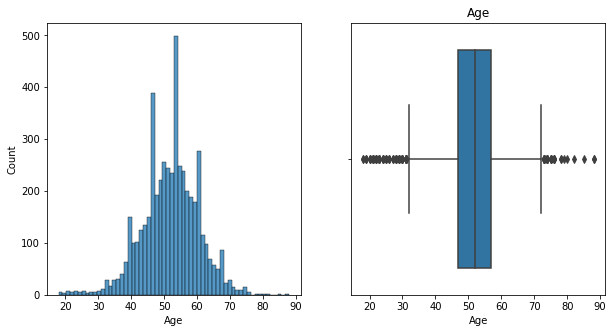

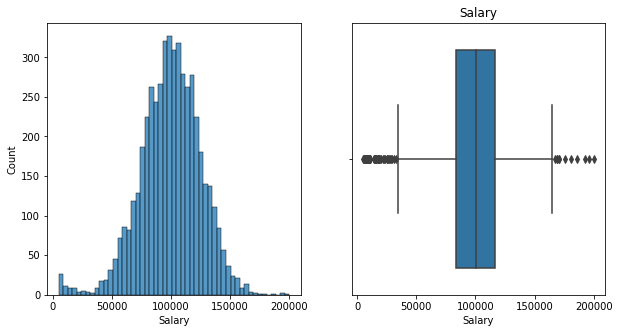

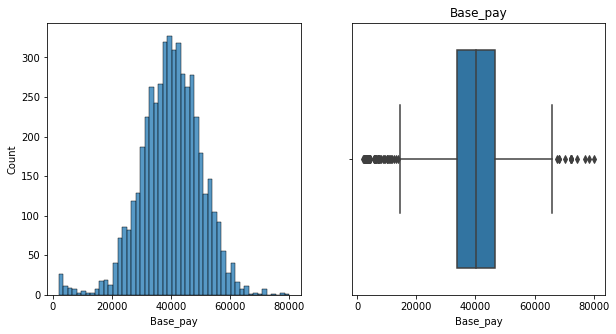

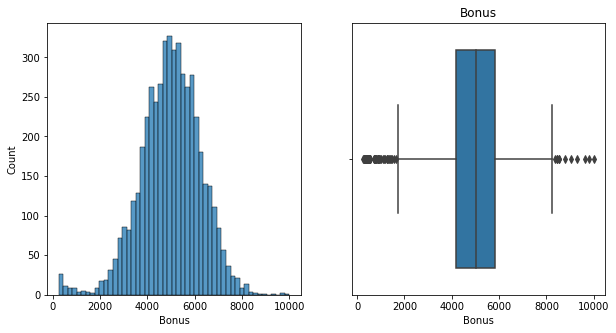

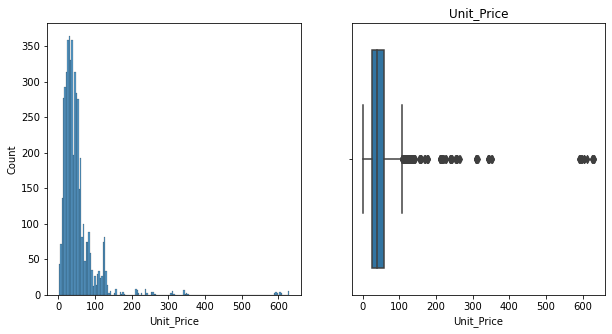

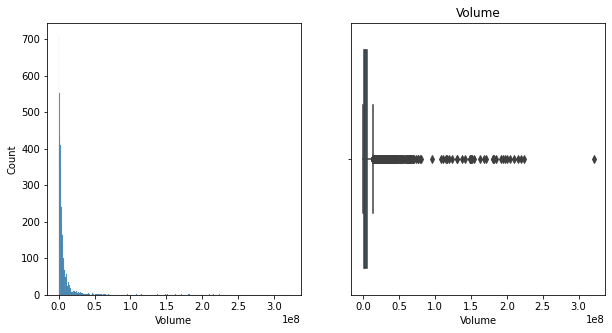

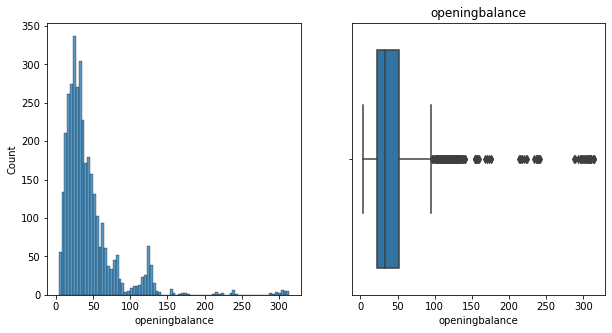

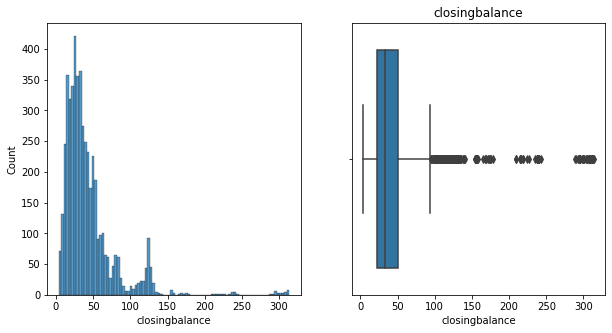

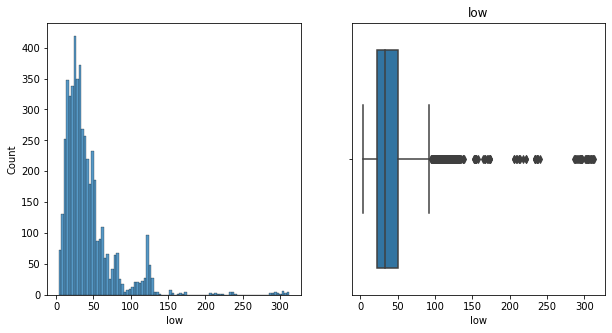

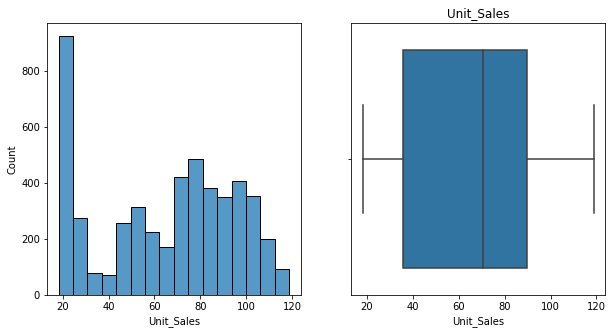

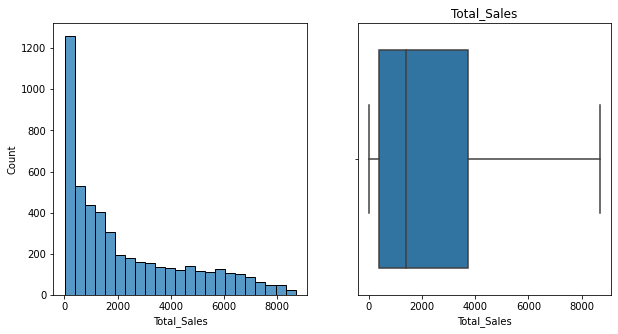

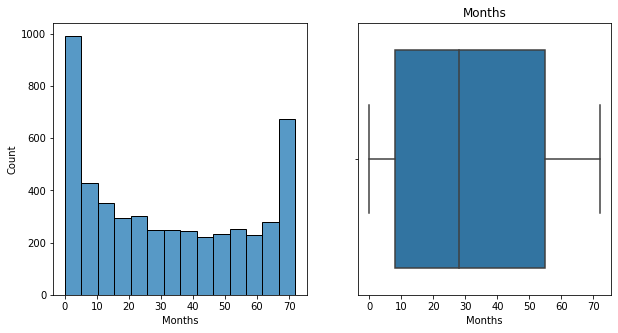

In [9]:
# Making a loop to see histogram and boxplot for each quantitative variable. Ignoring 'Business' as its qualitative (Dummy Var)
for i in cont_var[1:]: 
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
    plt.title(i)
    sns.histplot(ax=axes[0],x=hr_data[i])
    sns.boxplot(ax=axes[1],x=hr_data[i])
    plt.show()

#### Inferences from the above figures:

1. <b> Age: </b> The distribution is almost symmetrical with high peaks. Majority of the employees are aged between 45-55. There are outliers but I don't think we should treat them as age of employees can be anything above 18. Less number of people take jobs after high school or continue to do job after 60 yrs, but then, It is possible. And in general age does affect the salary as with more age comes more knowledge and experience, though any claim can be made only after analyzing the data more. <br> <br>

2. <b> Salary: </b> Salary also has similar characteristics as Age. It has normal distribution of data with outliers (which should not be treated) <br> <br>

3. <b> Base_pay: </b> The median base pay is 40000, with outliers. Outliers are normal here as base_pay changes significantly based on the job profile. <br> <br>

4. <b> Bonus: </b> The median bonus is around 5000. Outliers are normal as based on salary, bonus also varies. <br> <br>

5. <b> Unit_Price: </b> Unit price of sale is mostly between 0 to 100 with outliers. The outliers seem to be natural as there are always few high end products in sales which are costly. <br> <br>

6. <b> Volume: </b> Volume sold varies from 0 to thousands and more. A new employee would have less sold items under their name as compared to an old employee. So, outliers are normal. <br> <br>

7. <b> openingbalance and closingbalance: </b> Both of them have nearly same distribution.<br> <br>

9. <b> low: </b> Lowest balance alloted to a person might vary based on experience/previous achievements.<br> <br>

10. <b> Unit_Sales: </b> The distribution is not symmetrical. Its kind of skewed. Mostly units sold is around 20-30. Median is around 70. <br> <br>

11. <b> Total_Sales: </b> This is also not symmetrical. Majority of Total_Sales is between 0-2000. This is right skewed.<br> <br>

12. <b> Months: </b> Around 20% of the people in the firm are new (0-5 months). On average an employee has spent 2.5 years in company. Also, around 15% of the people have worked in the company for 5.5-6 years and hence might be senior officials.


    

## Univariate Analysis for Qualitative Variables

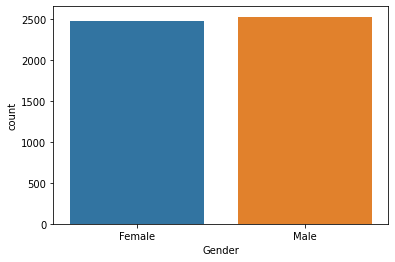

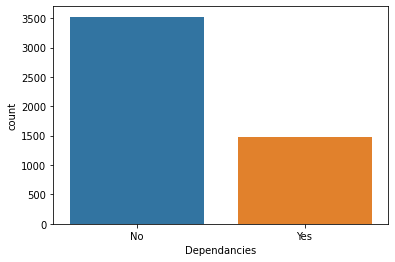

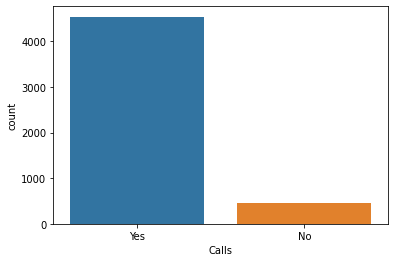

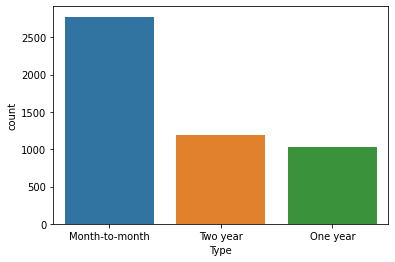

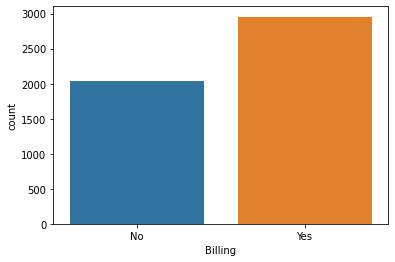

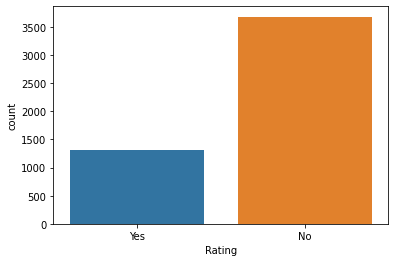

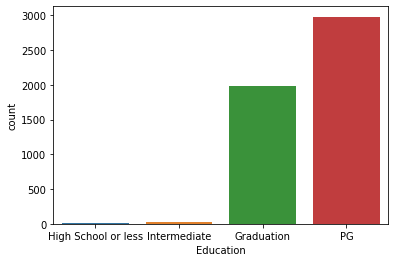

In [10]:
for i in qual_var:
    sns.countplot(x=hr_data[i])
    plt.show()

#### Inferences from the above figures (qualitative):

1. <b> Gender: </b> There are 56 more males than females in our dataset. It's a small imbalance and can be neglected meaning there won't be any huge bias because of this. <br> <br>

2. <b> Dependancies: </b> Around 70% of employees don't have any dependants. <br> <br>

3. <b> Calls: </b> More than 90% of the employees have authority to make calls. <br> <br>

4. <b> Type: </b> Salary settlement is 'Month-to-Month' for around 55% employees. Aroud 25% have 'Two year' and rest 20% have 'One Year' <br> <br>

5. <b> Billing: </b> Around 60% of the employees are subscribed to billing plans. <br> <br>

6. <b> Rating: </b> Around 75% of employees don't have a rating. <br> <br>

7. <b> Education: </b> Around 99% of employees are either postgraduates (60%) or graduates(39%) 

## Bivariate Analysis

### Checking the claim made above for absence in rating and Months in company

<AxesSubplot:xlabel='Months'>

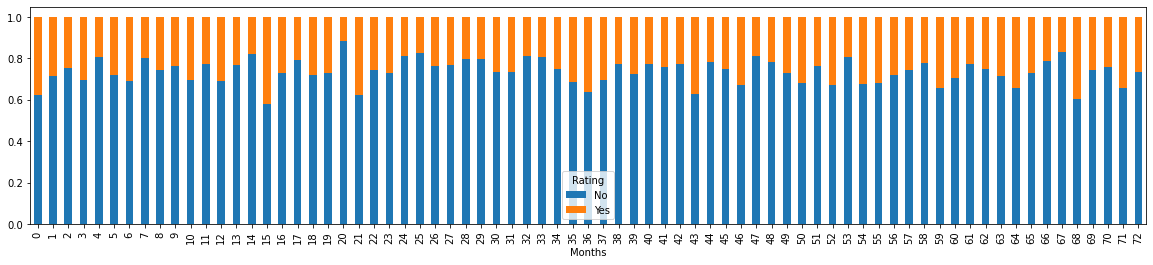

In [11]:
RM = pd.crosstab(hr_data['Months'],hr_data['Rating'])
RM.div(RM.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(20,4))

As it can be seen that Ratings given and months employed in company have no relation. Thus, the hypothesis formed above is False.

### Interactions between Continuous and Qualitative variables

#### Interactions between Salary and [Gender,Business,Dependancies,Calls,Type,Billing,Rating,Education]

<AxesSubplot:xlabel='Salary', ylabel='Density'>

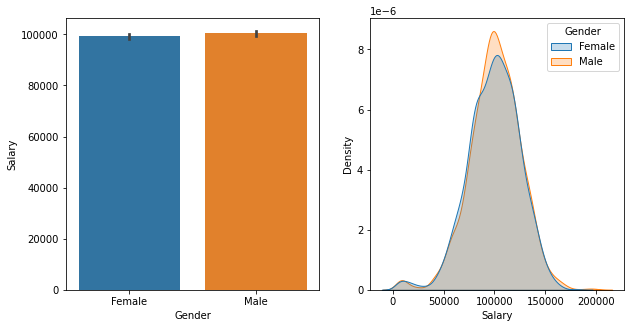

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Gender',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Gender',fill=True,ax=axes[1])

The Salaries of both Female and Male are almost similar as it can be seen from barplot. The kdeplot shows that no. of  males is slightly higher than females and mean is almost same for both as it can be seen from the peaks.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

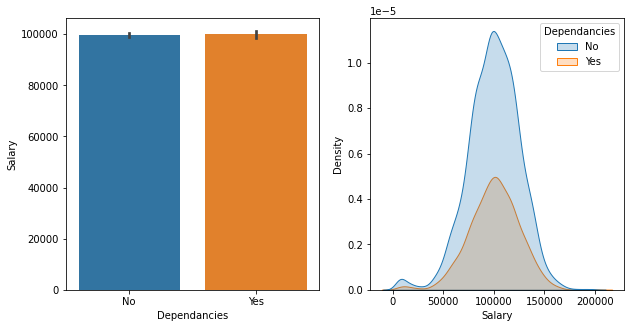

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Dependancies',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Dependancies',fill=True,ax=axes[1])

The salaries are unaffected by depandancies.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

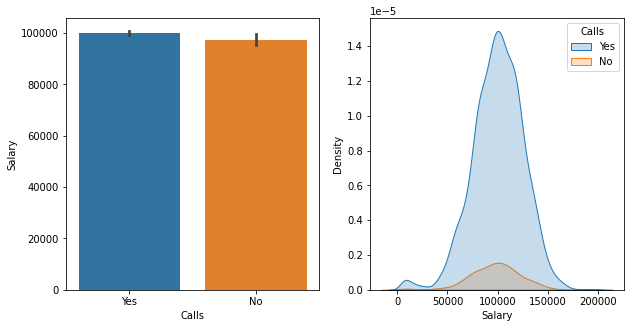

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Calls',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Calls',fill=True,ax=axes[1])

Those who aren't authorised for calls recieve lower salary than those who are authorised.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

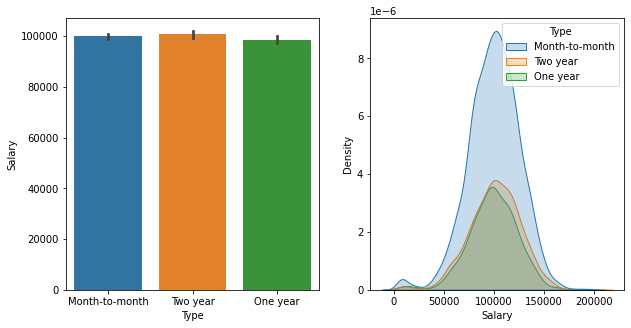

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Type',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Type',fill=True,ax=axes[1])

The Salary of 'Two year' Salary settlement type is slightly higher than 'Month-to-Month' and 'One Year'. 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

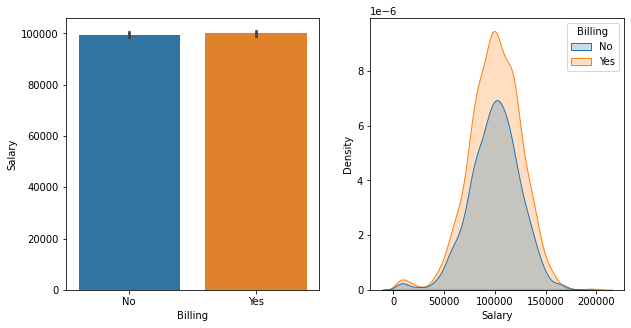

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Billing',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Billing',fill=True,ax=axes[1])

Whether subscribed to billing plans or not, there is no change in Salary.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

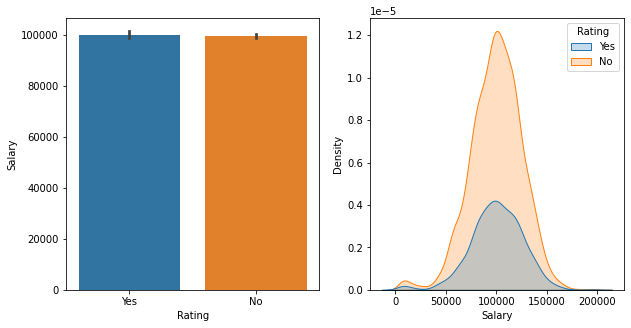

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,x='Rating',y='Salary',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Rating',fill=True,ax=axes[1])

Ratings have no effect on Salary. 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

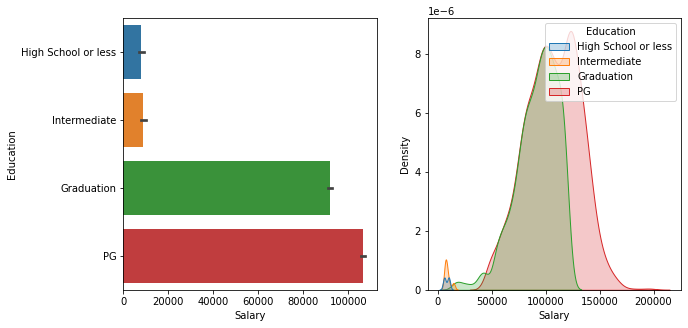

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.barplot(data=hr_data,y='Education',x='Salary',orient='h',ax=axes[0])
sns.kdeplot(data=hr_data,x='Salary',hue='Education',fill=True,ax=axes[1])

As expected, Salary of PG employees is higher than that of Graduate employees. The Salary of Intermediate/High School or less is significantly lower than others. This might be because of the reason they do blue collar jobs i.e. as a janitor, guard etc.

### Interactions between Continuous variables (Correlation)

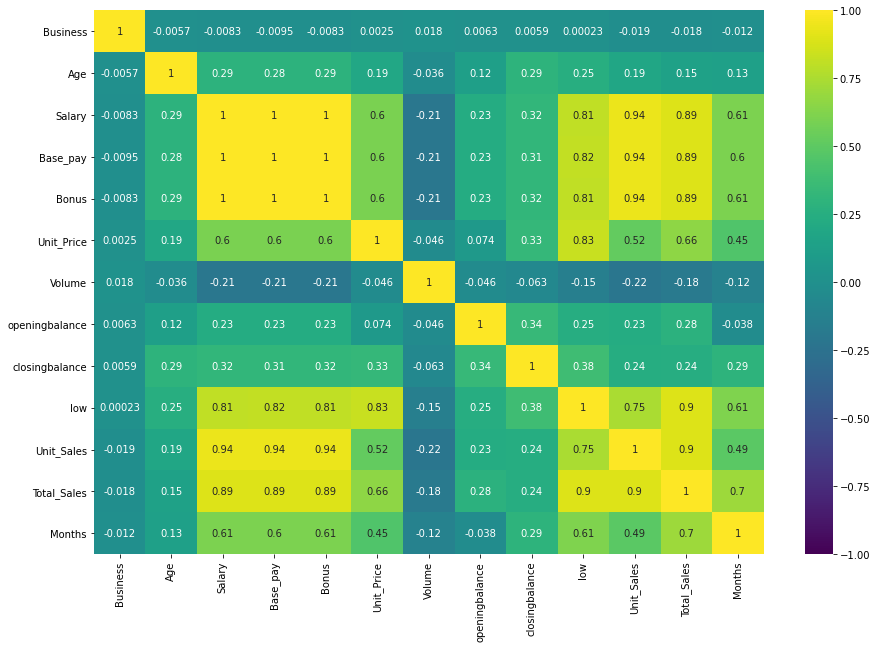

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(hr_data.corr(),cmap='viridis',annot=True,vmin=-1,vmax=1)
plt.show()

#### Inferences from the correlation plot:

1. Age has a low positive correlation with Salary,Base_pay,Bonus and closing balance. <br><br>
2. Salary is perfectly correlated with Base_pay and Bonus. This seems natural as Salary is generally sum of Base pay and bonus. Having all three in the data will result in multicollinearity.<br><br>
3. Salary is highly positively correlated with Unit_sales (0.94), Total_Sales(0.89) and low(0.81).This means that with more lowest balance, sales is greater and consequently salary is more.<br><br>
4. Salary is moderately positively correlated with Unit_price and Months. With more months in company, Salary is more. <br><br>
5. Unit_Price is highly positively correlated with lowest balance alloted to person and moderately correlated with Months, Total_Sales,Unit_Sales and Salary.<br><br>
6. 'low' or lowest balance alloted to person is highly positively correlated with Total_Sales (0.9), Salary (0.81).<br><br>
7. Unit_Sales is highly correlated with Total_Sales, Salary and moderately with Unit_Price. This means with increase in Sales by a person, Base_pay and Bonus increases , which results in increase in Salary.<br><br>
8. Total_Sales is moderately positively correlated with Unit_price and Months i.e. for increase in months in company, Total_Sales also increases.<br><br>

## Multivariate Analysis

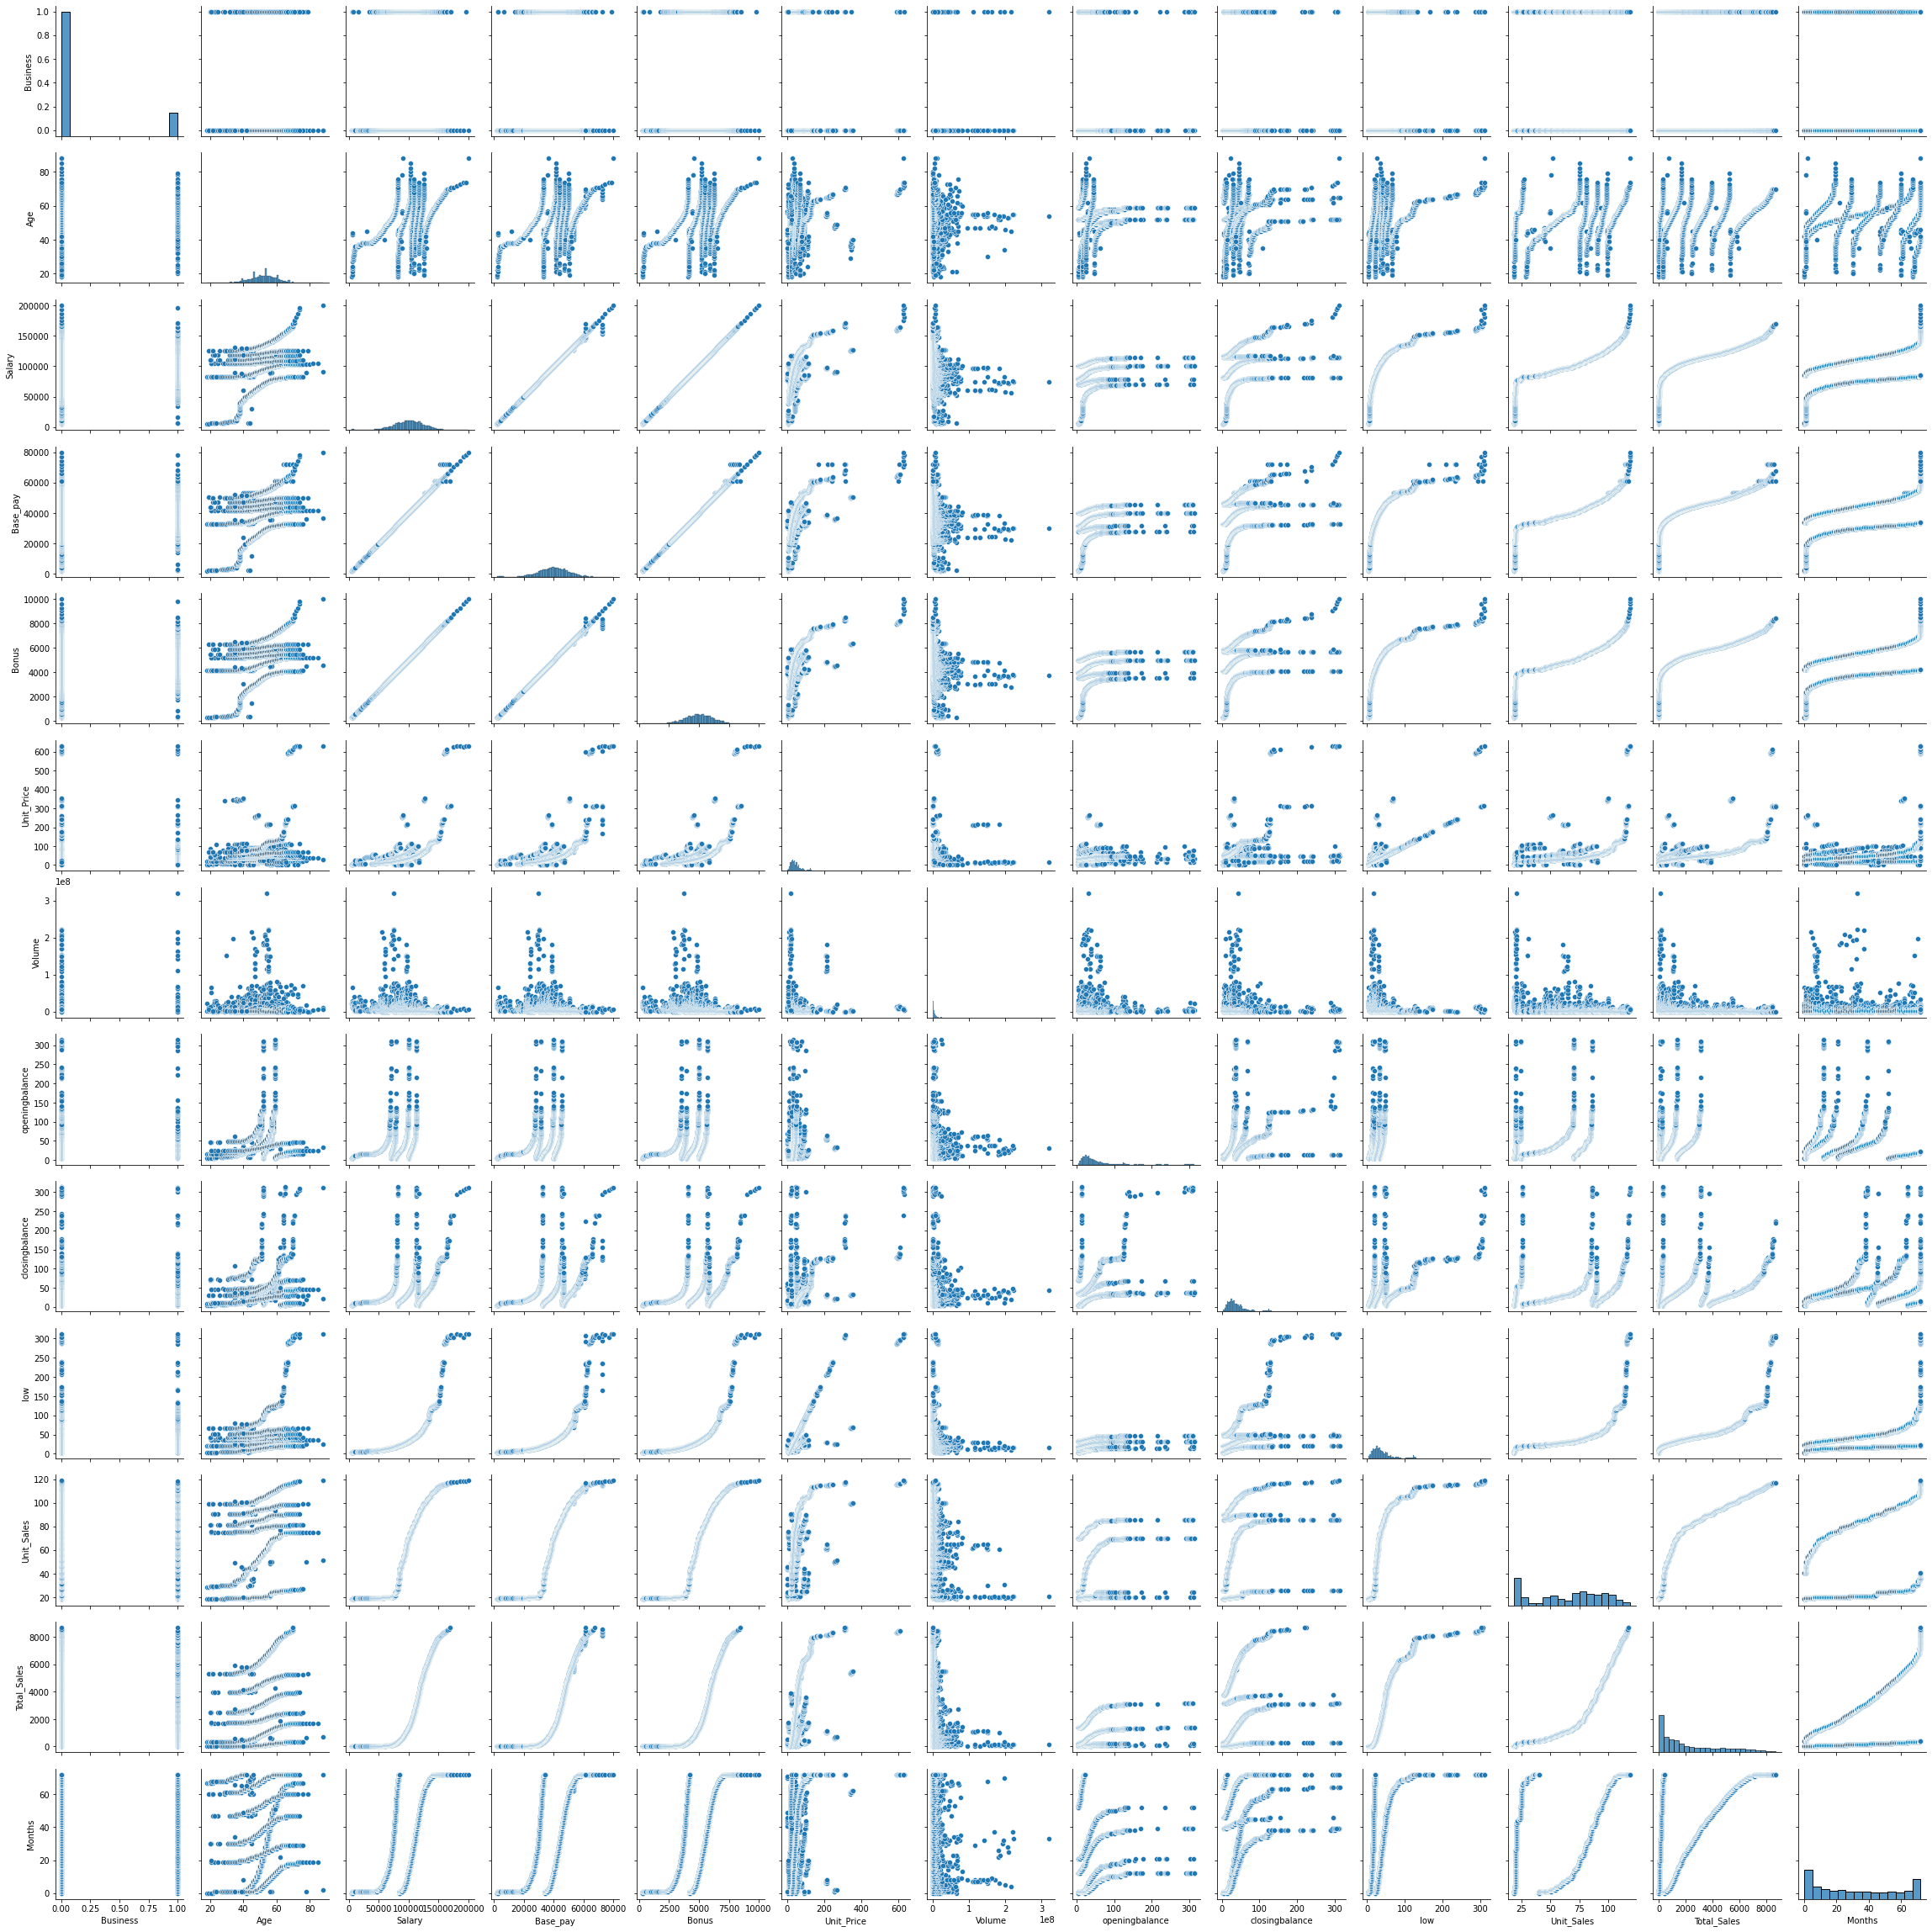

In [20]:
sns.pairplot(hr_data)

This is useful incase we forgot to study some relationship. We have studied all relationships and now we need to use them in the further analysis.

# Handling Missing Data

As we earlier found out we have missing data in Base_pay,openingbalance, Total_Sales.
Let's see each one of them and fill the missing values or drop column.

In [21]:
hr_data['Base_pay'].isna().value_counts()

False    4977
True       23
Name: Base_pay, dtype: int64

In [22]:
hr_data['Base_pay'] = hr_data['Base_pay'].fillna(hr_data['Base_pay'].mean())
hr_data['Base_pay'].isna().value_counts()

False    5000
Name: Base_pay, dtype: int64

In [23]:
hr_data['openingbalance'].isna().value_counts(normalize=True)

False    0.7048
True     0.2952
Name: openingbalance, dtype: float64

In [24]:
hr_data['openingbalance'] = hr_data['openingbalance'].fillna(hr_data['openingbalance'].mean())
hr_data['openingbalance'].isna().value_counts()

False    5000
Name: openingbalance, dtype: int64

In [25]:
hr_data['Total_Sales'].isna().value_counts()

False    4984
True       16
Name: Total_Sales, dtype: int64

In [26]:
hr_data['Total_Sales'] = hr_data['Total_Sales'].fillna(hr_data['Total_Sales'].mean())
hr_data['Total_Sales'].isna().value_counts()

False    5000
Name: Total_Sales, dtype: int64

# Feature Engineering

## Removing Unneccessary Variables

In [27]:
hr_data.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


Here, all the variables are necessary but One of Base_pay and Bonus can be removed as they are perfectly correlated with each other. Salary needs to be saved in a different variable for ease in splitting. Dummy variables to be created.

In [28]:
Y = hr_data['Salary']
X = hr_data.drop(['Salary'],axis=1)
print("X shape :",X.shape)
print("Y shape :",Y.shape)

X shape : (5000, 19)
Y shape : (5000,)


In [29]:
X.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [30]:
X = pd.get_dummies(data=X,drop_first=True)

#### VIF

In [31]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(X)

,variables,VIF
0,Business,1.280968
1,Age,43.073490
2,Base_pay,885.741509
3,Bonus,1096.858464
4,Unit_Price,7.713752
5,Volume,1.247521
6,openingbalance,3.359183
7,closingbalance,3.578105
8,low,27.163167
9,Unit_Sales,120.407652


In [33]:
X = X.drop(['Age','Base_pay','Unit_Sales','openingbalance','Calls_Yes','low','Unit_Price','closingbalance','Months','Total_Sales','Business'],axis=1)

In [34]:
calc_vif(X)

,variables,VIF
0,Bonus,6.433674
1,Volume,1.146867
2,Gender_Male,1.955698
3,Dependancies_Yes,1.501384
4,Type_One year,1.452923
5,Type_Two year,1.675950
6,Billing_Yes,2.427756
7,Rating_Yes,1.618064
8,Education_High School or less,1.015691
9,Education_Intermediate,1.018675


## Splitting Data

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

## Rescaling

In [36]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
SS.fit(x_train)
x_train = SS.transform(x_train)
x_test = SS.transform(x_test)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
print('MSE: %.2f'% mean_squared_error(y_test,y_pred))

Coefficient of determination: 1.00
MSE: 0.00


In [39]:
LR.coef_

array([ 2.53399074e+04, -1.41845900e-08, -1.07662867e-07, -1.20069860e-08,
       -9.98126123e-08, -7.37337754e-08, -7.90582782e-08, -6.63921112e-08,
        4.61427959e-07,  6.53470903e-07, -1.70520376e-07])

## Checking Assumptions

In [40]:
df_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_results['Residuals'] = abs(df_results['Actual'])-abs(df_results['Predicted'])

### Linearity

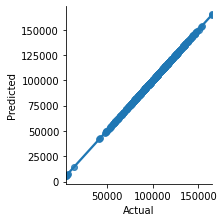

In [41]:
sns.lmplot(x='Actual',y='Predicted',data=df_results,height=3)
plt.show()

### Multicollinearity

Already done. VIF < 10 implies that there is no serious multicorrelation.

### Normality

In [42]:
df_results

,Actual,Predicted,Residuals
3896,119010.03170,119010.031699,1.074819e-06
2719,103217.37450,103217.374498,1.768902e-06
1811,92318.48420,92318.484197,3.003777e-06
2937,105851.12400,105851.123998,2.105298e-06
3017,106993.92590,106993.925898,1.799839e-06
...,...,...,...
1612,89485.85021,89485.850216,-6.363887e-06
3391,111864.38690,111864.386898,1.619759e-06
4232,124931.11390,124931.113899,6.488117e-07
4794,140815.04460,140815.044601,-6.725604e-07


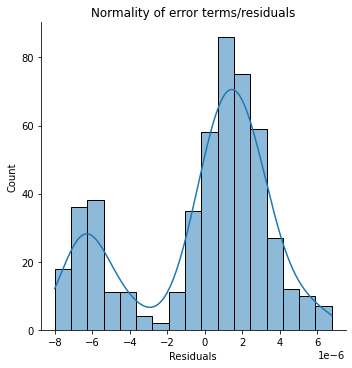

In [43]:
p = sns.displot(df_results['Residuals'],kde=True)
p = plt.title('Normality of error terms/residuals')

Both peaks are individually normally distributed. This might happen if some important variable is missing in analysis.

### Autocorrelation

In [44]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(df_results['Residuals'])
print(dw)
#  No autocorrelation

1.9370273536373805


If durbin watson statistics states that there is no autocorrelation if the statistic is between 1.5 and 2.5. <br><br>
Hence, there is no autocorrelation.

# Decision Trees

In [45]:
Y = hr_data['Salary']
X = hr_data.drop(['Salary'],axis=1)
print("X shape :",X.shape)
print("Y shape :",Y.shape)
X = pd.get_dummies(data=X,drop_first=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

X shape : (5000, 19)
Y shape : (5000,)


In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
print('MSE: %.2f'% mean_squared_error(y_test,y_pred))

Coefficient of determination: -1.03
MSE: 1379375021.55


Extremely bad results

# Random Forest

In [47]:
Y = hr_data['Salary']
X = hr_data.drop(['Salary'],axis=1)
print("X shape :",X.shape)
print("Y shape :",Y.shape)
X = pd.get_dummies(data=X,drop_first=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)


X shape : (5000, 19)
Y shape : (5000,)


In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5)


In [49]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
print('MSE: %.2f'% mean_squared_error(y_test,y_pred))
ms_cross = cross_val_score(regressor,x_train,y_train,scoring = 'neg_mean_squared_error',cv=5 )
mean_ms = np.mean(ms_cross)
print(mean_ms) # nearer to 0 means less mse

Coefficient of determination: 1.00
MSE: 476359.32
-87893.36927085137


Linear Regression performs better as it has mse=0.

# Keras

In [51]:
import keras
import tensorflow

Using TensorFlow backend.
C:\Users\Lenovo PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo PC\Anaconda3\lib\site-packages\tensorflow\python\fra

In [52]:
Y = hr_data['Salary']
X = hr_data.drop(['Salary'],axis=1)
print("X shape :",X.shape)
print("Y shape :",Y.shape)
X = pd.get_dummies(data=X,drop_first=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

X shape : (5000, 19)
Y shape : (5000,)


In [53]:
from sklearn.preprocessing import StandardScaler
##Normalization is done so that the difference between highest and lowest data point is not too large
import numpy as np
scaler=StandardScaler()
##To find mean and std dev
scaler.fit(x_train)
## Please Note - We are using mean and std dev of training data for testing data too. It is done to ensure that no information of test data is leaked to the model.
##Converting data into form where mean of data is 0 and std dev is 1 
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)
print(np.amax(X_train,axis=0))
print(np.amin(X_train,axis=0))

[ 2.28374027  4.23317877  3.68020897  3.68084734 11.45168111 18.84950929
  8.31876149  7.47804526  7.35915675  1.78888731  2.8380481   1.61962621
  0.98938962  1.53973586  0.31831052  1.96458933  1.77088379  0.83975673
  1.68608106 20.20126009 13.65650028  0.82521887]
[-0.43787817 -3.96415024 -3.77066273 -3.74808654 -0.98059713 -0.40911368
 -1.24394642 -1.09684225 -1.08006625 -1.54204671 -0.99239582 -1.30613618
 -1.01072417 -0.64946204 -3.14158642 -0.50901223 -0.56468979 -1.19082107
 -0.5930913  -0.04950186 -0.0732252  -1.21179973]


In [54]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear')) 
##Compiling the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [55]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 115       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, epochs=195, batch_size = 80 ,validation_split=0.1)

Train on 4050 samples, validate on 450 samples
Epoch 1/195
4050/4050 [==============================] - 1s 212us/sample - loss: 10597095606.0444 - mse: 10597096448.0000 - val_loss: 10423471968.7111 - val_mse: 10423472128.0000
Epoch 2/195
4050/4050 [==============================] - 0s 23us/sample - loss: 10597028317.8667 - mse: 10597026816.0000 - val_loss: 10423377692.4444 - val_mse: 10423377920.0000
Epoch 3/195
4050/4050 [==============================] - 0s 15us/sample - loss: 10596881906.0938 - mse: 10596881408.0000 - val_loss: 10423183382.7556 - val_mse: 10423183360.0000
Epoch 4/195
4050/4050 [==============================] - 0s 15us/sample - loss: 10596578771.7531 - mse: 10596578304.0000 - val_loss: 10422798199.4667 - val_mse: 10422798336.0000
Epoch 5/195
4050/4050 [==============================] - 0s 15us/sample - loss: 10595985112.1778 - mse: 10595984384.0000 - val_loss: 10422079010.1333 - val_mse: 10422078464.0000
Epoch 6/195
4050/4050 [==============================] - 0s 15

In [57]:
testing=model.evaluate(X_test, y_test)

500/500 [==============================] - 0s 126us/sample - loss: 59160959.8080 - mse: 59160960.0000


# Results and Discussion

## As it can be seen from MSE and R square values, the best results are given by LINEAR REGRESSION. It is the fastest and has best explainability as well. From linear regression, we are getting a perfect model. Mean squared error is 0 meaning all the predicted values are same as actual values. The residuals are present but they are negligible. The R^2 value is 1.0 meaning our model is able to explain 100% variability in the data. Rest all models are increasing MSE and reducing R^2. The only major coefficient in model is Bonus. So, mainly bonus determines the Salary in general. If bonus increases by 'x' units, Salary increases by 20x units. Similar, strong relationship may also be found out for Base pay but it's not as accurate as bonus.   <br> <br>
## Thus, HR department should ,mainly focus on Bonus to determine the Salary.